# Обработка данных, полученных с программы
## 1000000x1500, ds = 0.08, новый V_ref

In [1]:
# Импротируем необходимые функции
import numpy as np # работа с массивами и линейной алгеброй
import matplotlib.pyplot as plt # для отрисовки графиков
import pandas as pd # для чтения и работы с данными
from scipy.optimize import curve_fit # фитирующая процедура

In [2]:
def psi_f(x):
    return np.exp(-x**2/2)/np.sqrt(np.sqrt(np.pi))

def integrate_hist(hist, bin_edges):
    integral = 0
    for i in range(len(hist)):
        integral += hist[i]*(bin_edges[i+1] - bin_edges[i])
    return integral

def distr(df):
    pedestrians, bin_edges = np.histogram(df, bins = 1000)
    #print bin_edges
    
    width = bin_edges[1] - bin_edges[0]
    plt.figure(figsize=(7,7))
    plt.bar(bin_edges[:-1], pedestrians, width = width, align= 'edge')
    plt.xlabel('Ось x'.decode('utf-8'))
    plt.ylabel('Количество пешеходов (N)'.decode('utf-8'))
    plt.title('Распределение пешеходов по оси'.decode('utf-8'))
    plt.legend()
    plt.show()
    
    pedestrians_sq = pedestrians*pedestrians
    norm = integrate_hist(pedestrians_sq, bin_edges)
    psi_sq = pedestrians_sq/norm
    psi = pedestrians/np.sqrt(norm)

    plt.figure(figsize=(7,7))
    plt.bar(bin_edges[:-1], pedestrians, width = width, align= 'edge')
    plt.xlabel('x'.decode('utf-8'))
    plt.ylabel('$\psi(x)$'.decode('utf-8'))
    plt.title(''.decode('utf-8'))
    ###
    x = np.arange(-4, 4, 0.1)
    plt.plot(x, psi_f(x), color = 'black', label = '$\psi(x)$, теоретическая'.decode('utf-8'))
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(7,7))
    plt.bar(bin_edges[:-1], pedestrians, width = width, align= 'edge')
    plt.xlabel('x'.decode('utf-8'))
    plt.ylabel('$\psi^2(x)$'.decode('utf-8'))
    plt.title('Плотность вероятности'.decode('utf-8'))
    plt.plot(x, psi_f(x)**2, color = 'black', label = '$\psi^2(x)$, теоретическая'.decode('utf-8'))
    plt.legend()
    plt.show()

In [3]:
frame = pd.read_csv('D:\Backup(work)\data_output\output(1000000x1500)_ds=0.08_newRef\output.csv')
frame.head()

,x
0,0.498749
1,-0.063568
2,0.306702
3,-0.308716
4,-0.084991


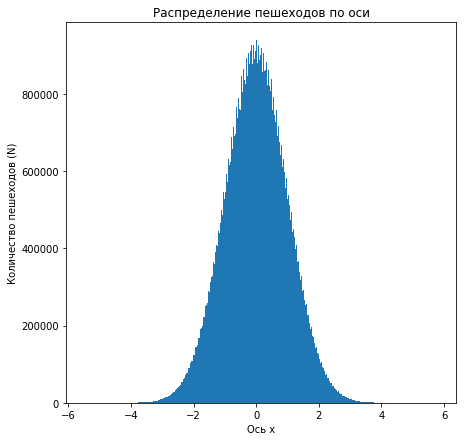

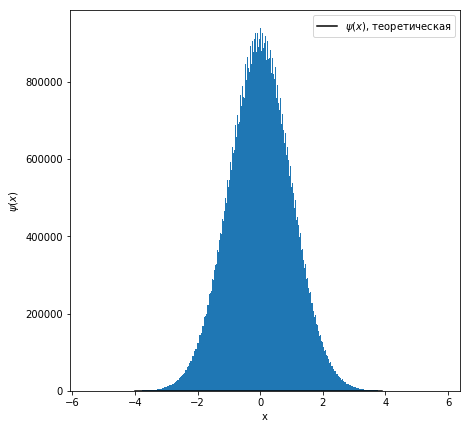

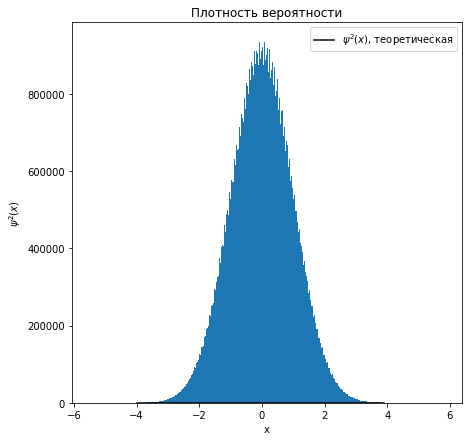

In [4]:
distr(frame)

In [5]:
def drawNE(df):
    plt.figure(figsize=(20,7))
    plt.scatter(np.arange(df.shape[0]), df['N'], linewidths=0.1, label = 'Количество пешеходов'.decode('utf-8') )
    plt.xlabel('Номер итерации'.decode('utf-8'))
    plt.ylabel('Количество пешеходов (N)'.decode('utf-8'))
    plt.title('Зависимость N от итерации'.decode('utf-8'))
    plt.legend()
    plt.grid()
    plt.show()
    
    plt.figure(figsize=(20,8))
    plt.plot(np.arange(df.shape[0]), df['E'], label = 'Данные'.decode('utf-8'))
    plt.xlabel('Номер итерации'.decode('utf-8'))
    plt.ylabel('E'.decode('utf-8'))
    plt.title('Зависимость энергии от итерации'.decode('utf-8'))
    plt.legend()
    plt.grid()
    plt.show()
    
    plt.figure(figsize=(20,8))
    plt.plot(np.arange(df.shape[0]), df['E_r'], label = 'Данные'.decode('utf-8'))
    plt.xlabel('Номер итерации'.decode('utf-8'))
    plt.ylabel('E_r'.decode('utf-8'))
    plt.title('Зависимость опорного потенциала от итерации'.decode('utf-8'))
    plt.legend()
    plt.grid()
    plt.show()

In [6]:
frameNE = pd.read_csv('D:\Backup(work)\data_output\output(1000000x1500)_ds=0.08_newRef\outputNE.csv')

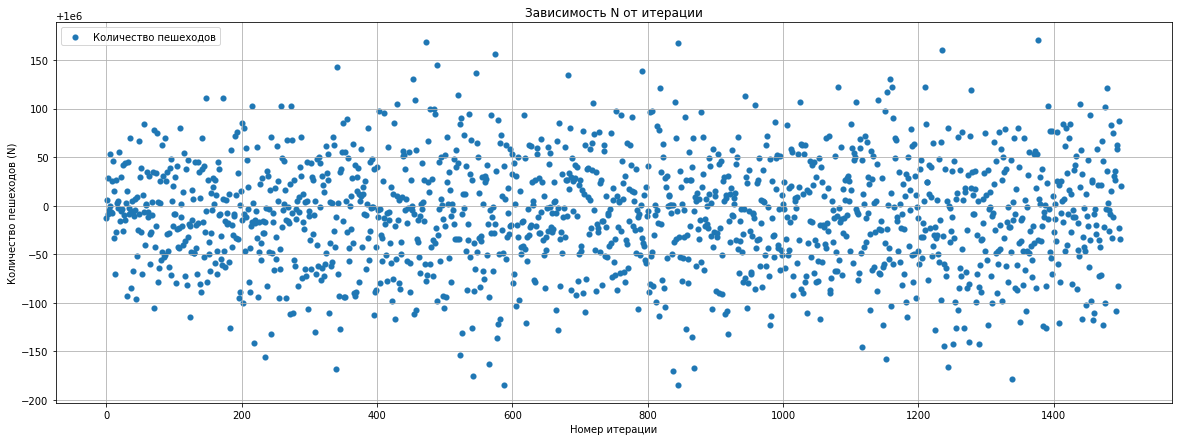

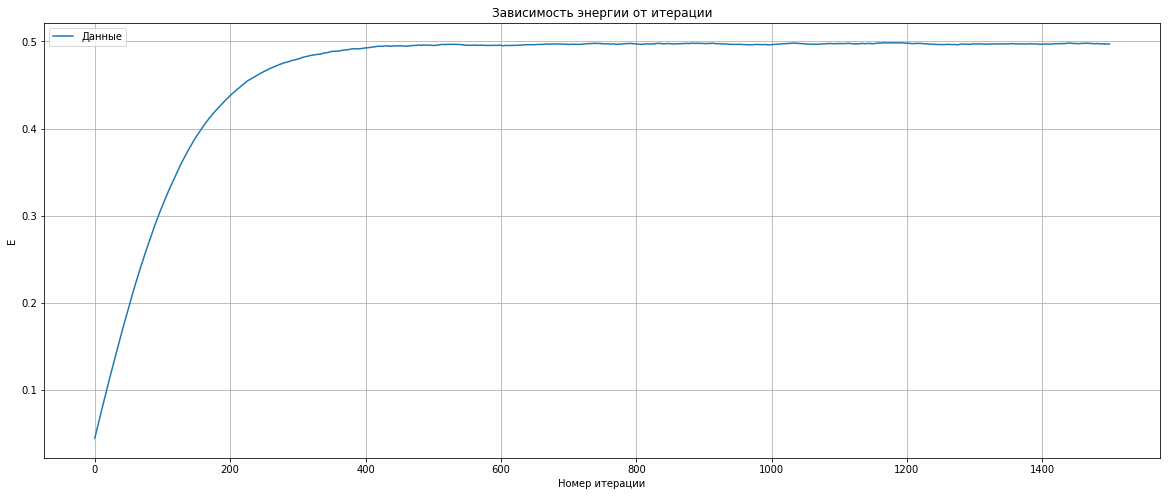

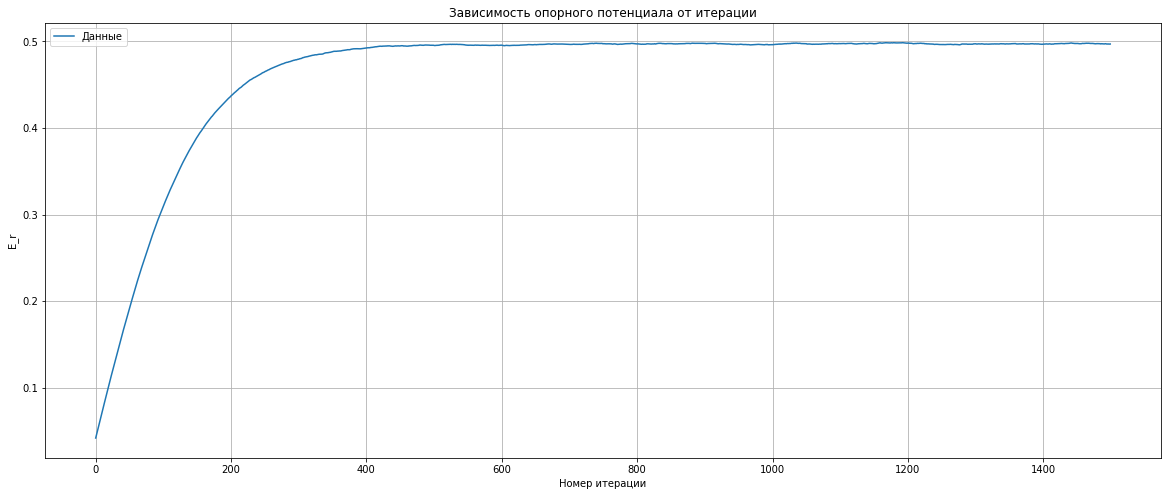

In [7]:
drawNE(frameNE)

In [8]:
print frameNE['N'].mean()
print frameNE[1200:]['E'].mean()
print frameNE[1200:]['E_r'].mean()

999990.706
0.49724478
0.4972485


А теперь посмотрим на старую ситуацию

In [9]:
frame = pd.read_csv('D:\Backup(work)\data_output\output(1000000x1000)_ds=0.08\output.csv')
frame.head()

,x
0,0.498749
1,-0.063568
2,0.306702
3,-0.308716
4,-0.084991


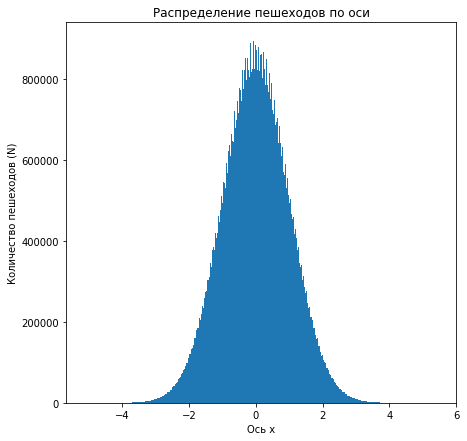

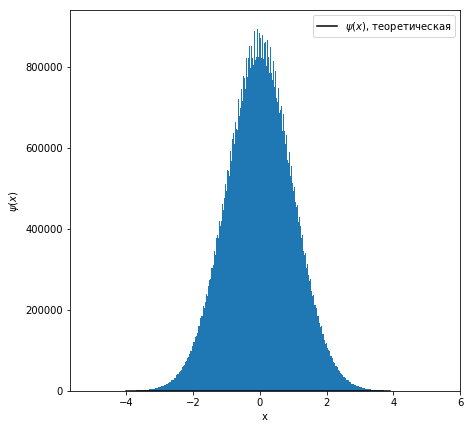

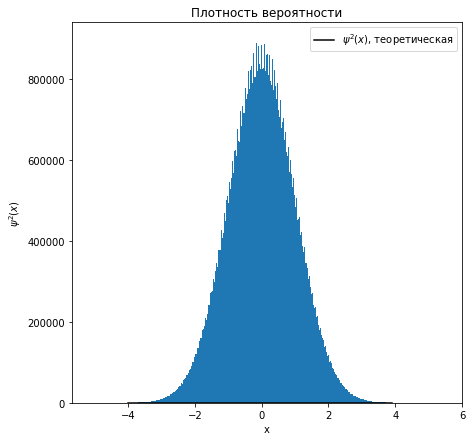

In [10]:
distr(frame)

In [11]:
frameNE = pd.read_csv('D:\Backup(work)\data_output\output(1000000x1000)_ds=0.08\outputNE.csv')

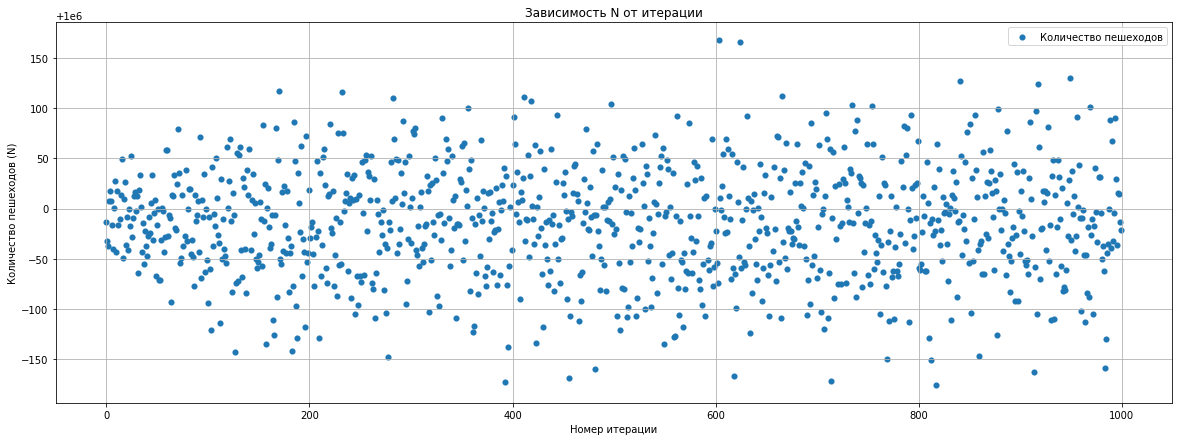

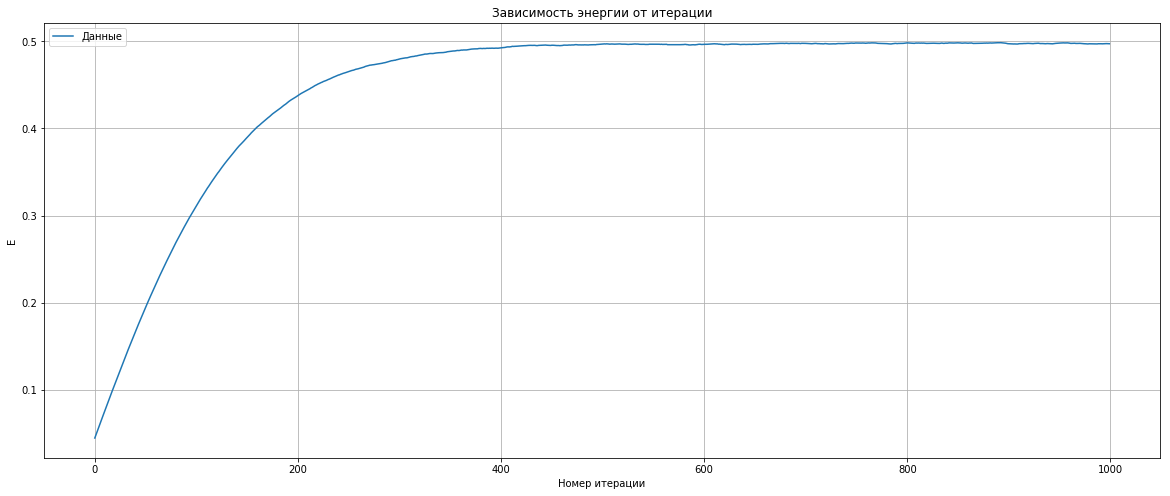

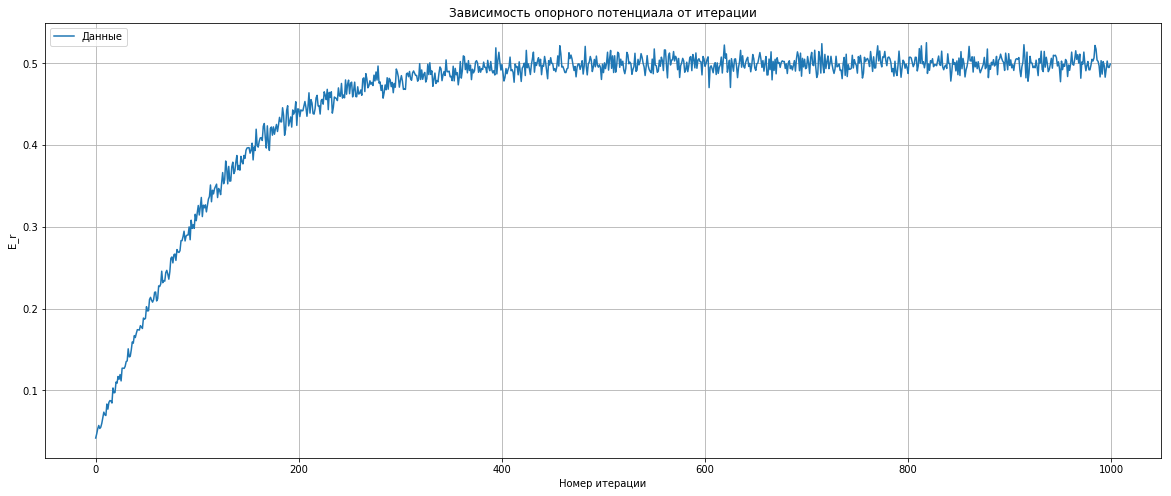

In [12]:
drawNE(frameNE)

In [13]:
print frameNE['N'].mean()
print frameNE[800:]['E'].mean()
print frameNE[800:]['E_r'].mean()

999985.837
0.497641675
0.499825855


1. Почистить программу (вывод распределения, V, N, после всего).
2. randmax
3. Посчитать ds = 0.1 для гарм. по новой программе
4. ds поставить меньше для ямы
5. Ввеости в программе константы для того, чтобы можно было задать левый и правый край нечального распределения и ямы.
6. Для конечной ямы: V_0/V = 0.1, V_0 - уровень энергии в беск яме, V - высота ямы.